## Script até aqui

In [ ]:
caminho_dados = '/content/drive/MyDrive/Curso AD/dados_viagens/2023_Viagem.csv'

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=',')

# Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

# Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
 .groupby('Cargo')
 .agg(
    despesa_media=('Despesas', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_mais_frequente=('Destinos', pd.Series.mode),
    n_viagens=('Nome', 'count')
    )
 .reset_index()
 .sort_values(by='despesas_totais', ascending=False))

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

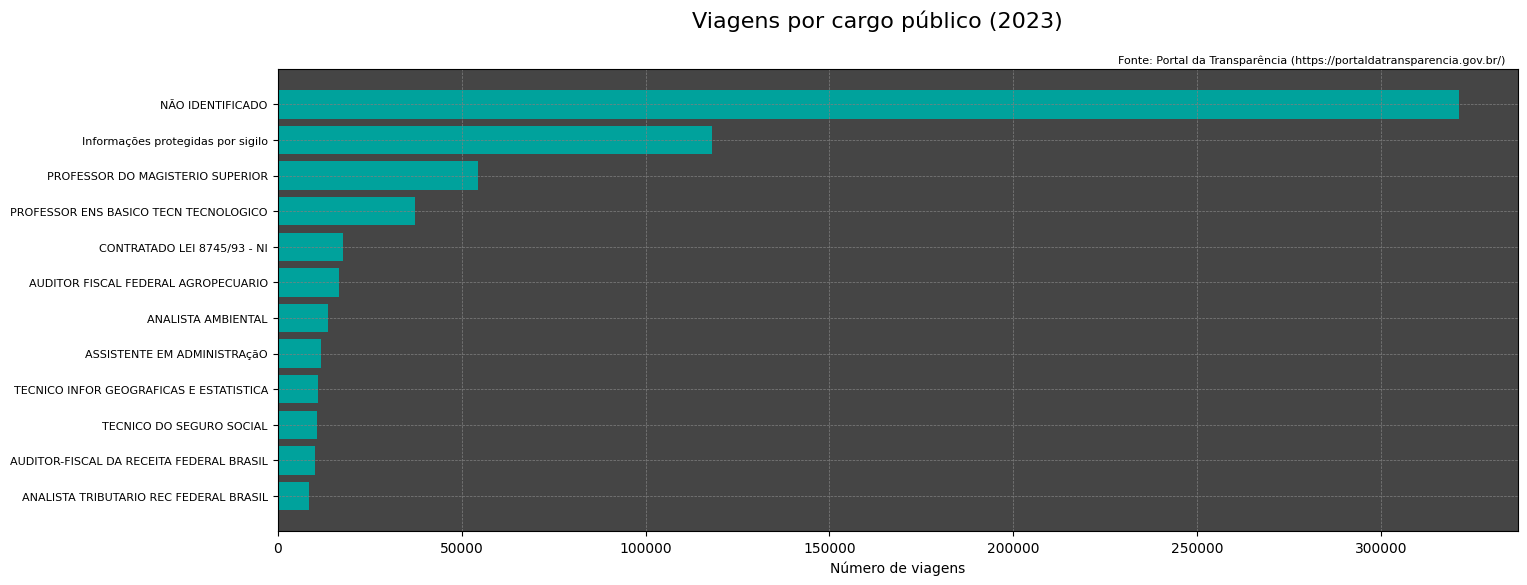

In [ ]:
import matplotlib.pyplot as plt

# Cria a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plota o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color='#00A29C')
ax.invert_yaxis()

# Ajusta o gráfico
ax.set_facecolor('#454545')
fig.suptitle('Viagens por cargo público (2023)', fontsize=16)
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Número de viagens')

# Exibe o gráfico
plt.show()

## Salvando Arquivos
Antes de qualquer coisa: a pasta de saída deve existir no Google Drive!

In [ ]:
caminho_saida = '/content/drive/MyDrive/Curso AD/output/2023'

Para salvar um DataFrame, usamos `df.to_excel()`:

In [ ]:
caminho_tabela_excel = f'{caminho_saida}/tabela.xlsx'
df_final.to_excel(caminho_tabela_excel)

**Atenção**: não há mensagem de confirmação - se o arquivo já existir, será sobrescrito!
- Se não quiser salvar com índice, adicione `index=False`:

In [ ]:
caminho_tabela_excel = f'{caminho_saida}/tabela_sem_indice.xlsx'
df_final.to_excel(caminho_tabela_excel, index=False)

Dá para salvar em CSV com o método `df.to_csv()`.

### Salvando figuras
Podemos usar `plt.savefig()`.
- É preciso **recriar o gráfico** antes de salvar, para não salvar em branco.
  - Como o Colab exibe o gráfico abaixo da célula, o ideal é criar o gráfico e salvar na mesma célula!
- A extensão no caminho define o tipo de arquivo: png, jpg, svg...
- O argumento `bbox_inches="tight"` no `plt.savefig()` evita cortes ao redor do gráfico.

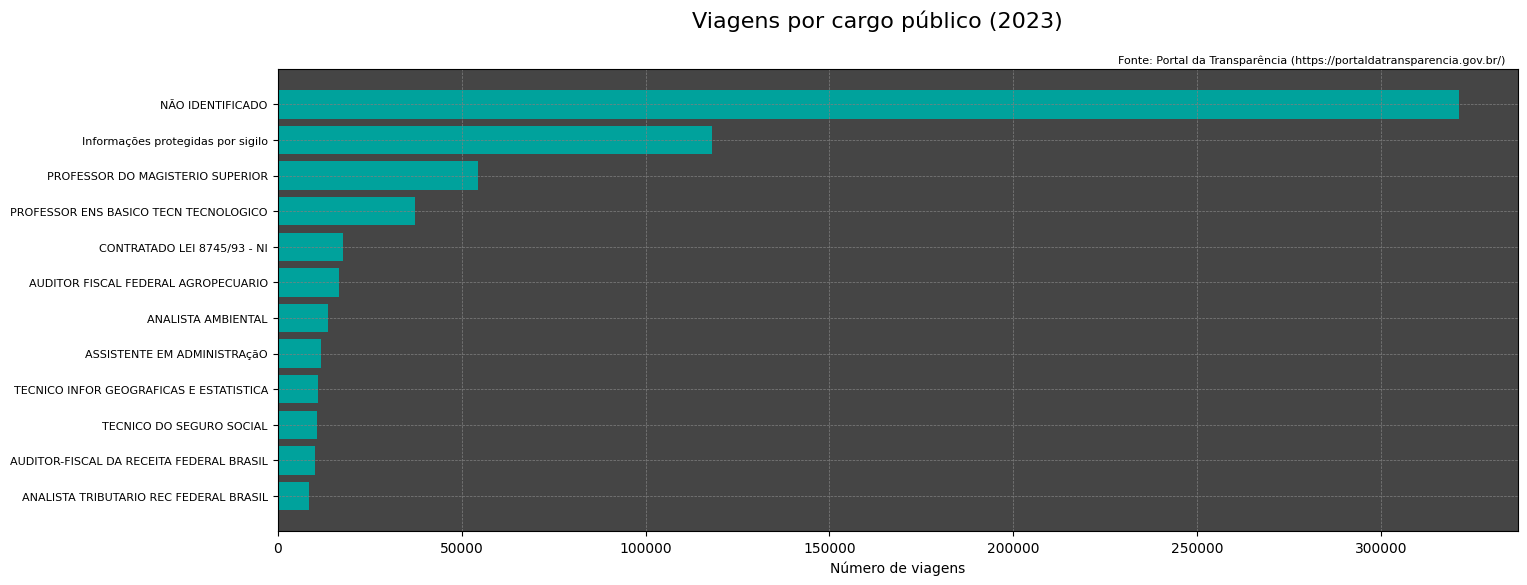

In [ ]:
# Cria a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plota o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color='#00A29C')
ax.invert_yaxis()

# Ajusta o gráfico
ax.set_facecolor('#454545')
fig.suptitle('Viagens por cargo público (2023)', fontsize=16)
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Número de viagens')

caminho_figura = f'{caminho_saida}/grafico.png'
plt.savefig(caminho_figura, bbox_inches='tight')

# Script final
**Agora temos tudo o que precisamos para criar um único código de análise de dados!**

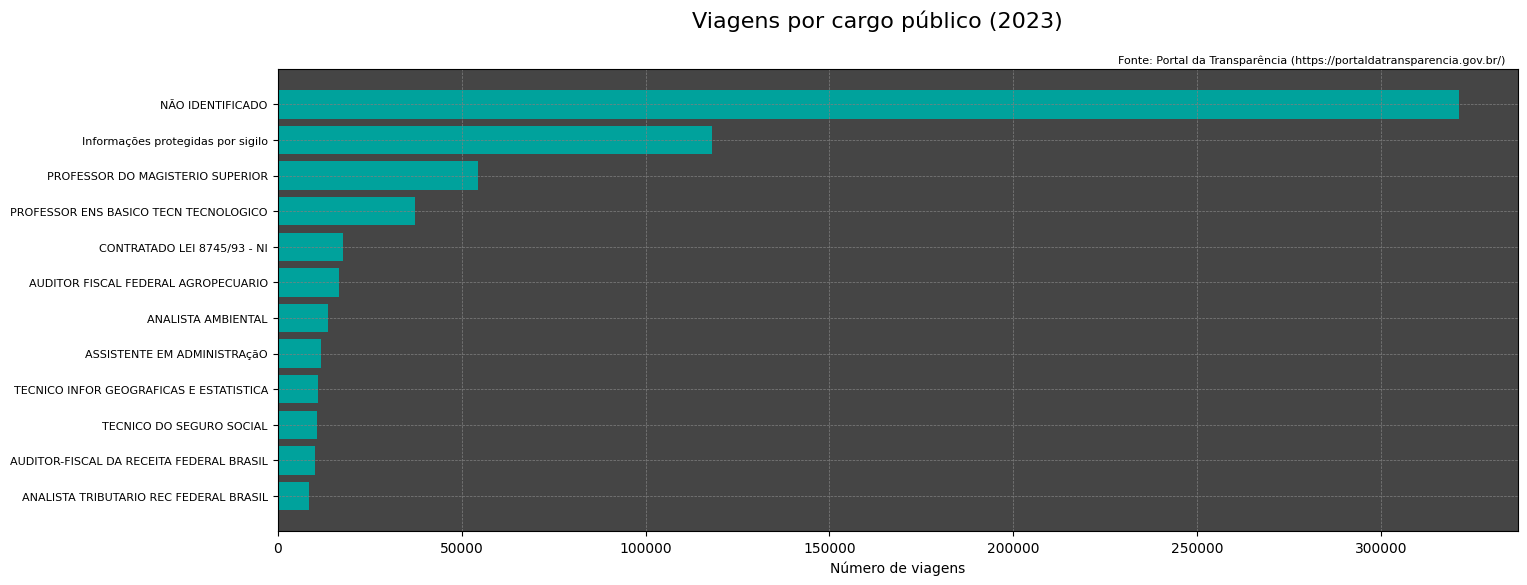

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

ano = 2023
caminho_dados = f'/content/drive/MyDrive/Curso AD/dados_viagens/{ano}_Viagem.csv'
caminho_saida = f'/content/drive/MyDrive/Curso AD/output/{ano}'


### ANÁLISE DE DADOS

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=',')

# Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

# Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
 .groupby('Cargo')
 .agg(
    despesa_media=('Despesas', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    despesas_totais=('Despesas', 'sum'),
    destino_mais_frequente=('Destinos', pd.Series.mode),
    n_viagens=('Nome', 'count')
    )
 .reset_index()
 .sort_values(by='despesas_totais', ascending=False))

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# Salvando tabela final
caminho_tabela_excel = f'{caminho_saida}/tabela_final.xlsx'
df_final.to_excel(caminho_tabela_excel, index=False)

### GERAÇÃO DE GRÁFICO

# Cria a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plota o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color='#00A29C')
ax.invert_yaxis()

# Ajusta o gráfico
ax.set_facecolor('#454545')
fig.suptitle(f'Viagens por cargo público ({ano})', fontsize=16)
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência (https://portaldatransparencia.gov.br/)', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Número de viagens')

# Salva o gráfico
caminho_figura = f'{caminho_saida}/grafico.png'
plt.savefig(caminho_figura, bbox_inches='tight')

**Dados analisados em menos de 20 segundos!**
- Poderia criar um loop para analisar todas as tabelas de uma pasta
- Poderia automatizar o download dos dados lá do Portal da Transparência - baixar todos os dias!